In [24]:
from __future__ import print_function
import numpy as np
import json
import csv

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

In [25]:
documents = []
with open("data.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        documents.append(row[1])
print (documents[:3])

['title', 'TIL After Col. Shaw died in battle, Confederates buried him in a mass grave as an insult for leading black soldiers. Union troops tried to recover his body, but his father sent a letter saying "We would not have his body removed from where it lies surrounded by his brave and devoted soldiers."', 'TIL that in 1916 there was a proposed Amendment to the US Constitution that would put all acts of war to a national vote, and anyone voting yes would have to register as a volunteer for service in the United States Army.']


In [6]:
vectorizer = TfidfVectorizer()
my_matrix = vectorizer.fit_transform([x for x in documents]).transpose()

In [7]:
print(type(my_matrix))
print(my_matrix.shape)

<class 'scipy.sparse.csc.csc_matrix'>
(12488, 3016)


In [10]:
u, s, v_trans = svds(my_matrix, k=100)
print(u.shape)
print(s.shape)
print(v_trans.shape)

(12488, 100)
(100,)
(100, 3016)


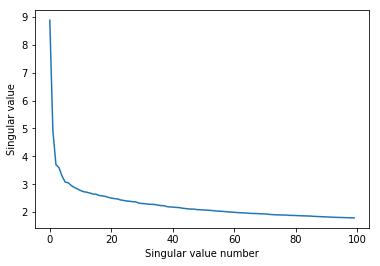

In [11]:
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [12]:
words_compressed, _, docs_compressed = svds(my_matrix, k=40)
docs_compressed = docs_compressed.transpose()
print(words_compressed.shape)
print(docs_compressed.shape)

(12488, 40)
(3016, 40)


In [13]:
word_to_index = vectorizer.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(12488, 40)


In [15]:
#row normalize
words_compressed = normalize(words_compressed, axis = 1)

In [16]:
def closest_words(word_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_compressed.dot(words_compressed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [17]:
closest_words("technology")

[('unharvested', 0.6358761761029482),
 ('edges', 0.6292976842912237),
 ('persons', 0.6235739030170236),
 ('unacceptable', 0.6235739030170236),
 ('artwork', 0.6217076612776958),
 ('bumpsy', 0.6190920508136389),
 ('lover', 0.6094803412389448),
 ('leaned', 0.6094803412389448),
 ('nymphs', 0.6094803412389448),
 ('hylas', 0.6094803412389448)]

In [19]:
tsne = TSNE(verbose=1)

In [20]:
print(docs_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
subset = docs_compressed[:5000,:]
projected_docs = tsne.fit_transform(subset)
print(projected_docs.shape)

(3016, 40)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3016 samples in 0.003s...
[t-SNE] Computed neighbors for 3016 samples in 0.758s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3016
[t-SNE] Computed conditional probabilities for sample 2000 / 3016
[t-SNE] Computed conditional probabilities for sample 3000 / 3016
[t-SNE] Computed conditional probabilities for sample 3016 / 3016
[t-SNE] Mean sigma: 0.032603
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.099808
[t-SNE] KL divergence after 1000 iterations: 2.335893
(3016, 2)


In [21]:
docs_compressed = normalize(docs_compressed, axis = 1)
def closest_projects(word, k = 5):
    sims = docs_compressed.dot(words_compressed[word_to_index[word],:])
    asort = np.argsort(-sims)[:k+1]
    return [(documents[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [22]:
for title, score in closest_projects("computer"):
    print("{}:{:.3f}".format(title, score))
    print ("\n")
print()

TIL Osborne Computers (1983) announced their improved new computer too early. People stopped buying the current one. It took so long for the new one to be released that the company went bankrupt.:0.941


Its funny how english people use the word résumé (a french word) but we french people, use the word curriculum vitae instead (a latin word)...:0.889


TIL The German Parliament building has a glass dome above it that people can climb using a spiral ramp. The dome symbolizes that the people are above the government, and the government should be transparent.:0.836


Fun Fact: Shortest people on average (men):0.832


Fun Fact: The German Parliament building has a glass dome above it that people can climb using a spiral ramp. The dome symbolises that the people are above the government, and the government should be transparent.:0.814



